In [106]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integ
from scipy.fft import fft,ifft

In [107]:
xmax = 8
dx = 0.01
xs = np.arange(-xmax,xmax+dx,dx,dtype =np.complex64)
N = np.size(xs)
dp = 2*np.pi/N/dx
p_max = dp*N/2
ps = np.arange(-p_max,p_max,dp,dtype = np.complex64)
dt = 0.01

In [108]:
GS = 1/np.sqrt(2)*np.pi**(-0.25)*np.exp(-xs**2/ 2)*(1+np.sqrt(2)*xs)

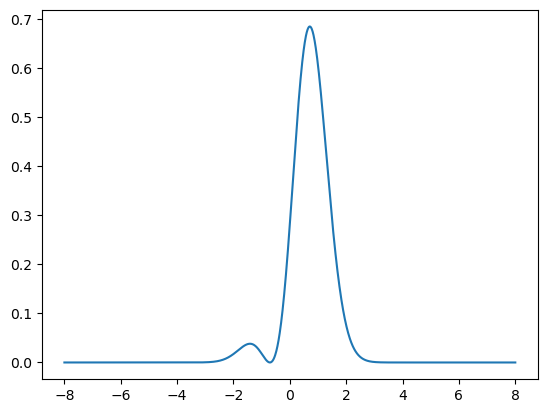

In [109]:
plt.plot(xs,GS**2)

1601
(1.0000078894449937+0j)


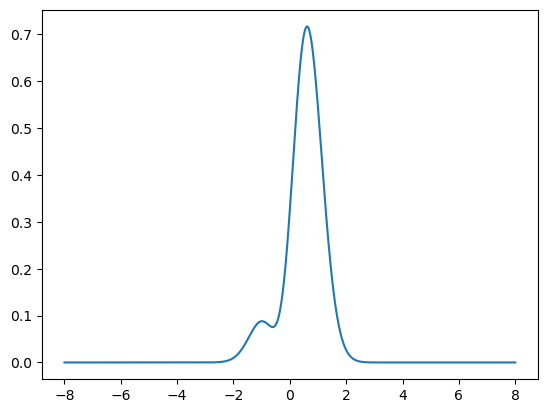

In [113]:
ns = np.arange(0,N,1)
print(np.size(ns))
F = GS*np.exp(-1j*(-p_max)*xs[0])*np.exp(-1j*(-p_max)*dx*ns)

T = 0.5*ps**2
Vx = 0.5*xs**2

H = fft(F)
def split_step_propagate(fftstate,T,V,dt):
    h = fftstate*np.exp(-1j*dt/2*T)
    f = ifft(h)
    f = f*np.exp(-1j*V*dt)
    h = fft(f)
    h = h*np.exp(-1j*V*dt)
    return h
t0 = 0
tf = 10
t = t0
while t < tf:
    t+=dt
    H = split_step_propagate(H,T,Vx,dt)

plt.plot(xs,np.abs(ifft(H)*np.exp(1j*(-p_max)*xs[0])*np.exp(1j*(-p_max)*dx*ns))**2)
print(integ.trapz(np.abs(ifft(H)*np.exp(1j*(-p_max)*xs[0])*np.exp(1j*(-p_max)*dx*ns))**2,xs))